In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
df = pd.read_csv('2021-22-data-sa-crime-q1-q4.csv')

In [24]:
df['Offence Level 2 Description'].value_counts()

THEFT AND RELATED OFFENCES              38215
PROPERTY DAMAGE AND ENVIRONMENTAL       17088
ACTS INTENDED TO CAUSE INJURY           16937
SERIOUS CRIMINAL TRESPASS               11353
FRAUD DECEPTION AND RELATED OFFENCES     4562
OTHER OFFENCES AGAINST THE PERSON        1226
SEXUAL ASSAULT AND RELATED OFFENCES       823
ROBBERY AND RELATED OFFENCES              600
HOMICIDE AND RELATED OFFENCES              39
Name: Offence Level 2 Description, dtype: int64

In [25]:
df.dtypes

Reported Date                  object
Suburb - Incident              object
Postcode - Incident            object
Offence Level 1 Description    object
Offence Level 2 Description    object
Offence Level 3 Description    object
Offence count                   int64
dtype: object

In [26]:
df['Date'] = pd.to_datetime(df['Reported Date'],dayfirst=True)

In [27]:
df['Date']

0       2021-07-01
1       2021-07-01
2       2021-07-01
3       2021-07-01
4       2021-07-01
           ...    
90838   2022-06-30
90839   2022-06-30
90840   2022-06-30
90841   2022-06-30
90842   2022-06-30
Name: Date, Length: 90843, dtype: datetime64[ns]

In [28]:
df['month'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['month_year'] = pd.DatetimeIndex(df['Date']).to_period('M')


In [29]:
df['month']

0        2021-07
1        2021-07
2        2021-07
3        2021-07
4        2021-07
          ...   
90838    2022-06
90839    2022-06
90840    2022-06
90841    2022-06
90842    2022-06
Name: month, Length: 90843, dtype: period[M]

In [30]:
monthly_counts = df.groupby(['month', 'Offence Level 2 Description'])['Offence count'].sum()

In [31]:
monthly_counts = monthly_counts.reset_index()
monthly_counts = monthly_counts.rename(columns={'month': 'Month', 'Offence Level 2 Description': 'Offence', 'Offence count': 'Offence Count'})

In [32]:
print(monthly_counts)


       Month                               Offence  Offence Count
0    2021-07         ACTS INTENDED TO CAUSE INJURY           1403
1    2021-07  FRAUD DECEPTION AND RELATED OFFENCES            464
2    2021-07         HOMICIDE AND RELATED OFFENCES              8
3    2021-07     OTHER OFFENCES AGAINST THE PERSON            105
4    2021-07     PROPERTY DAMAGE AND ENVIRONMENTAL           1579
..       ...                                   ...            ...
101  2022-06     PROPERTY DAMAGE AND ENVIRONMENTAL           1717
102  2022-06          ROBBERY AND RELATED OFFENCES             77
103  2022-06             SERIOUS CRIMINAL TRESPASS            937
104  2022-06   SEXUAL ASSAULT AND RELATED OFFENCES            186
105  2022-06            THEFT AND RELATED OFFENCES           4055

[106 rows x 3 columns]


In [34]:
monthly_counts['Offence'].value_counts()


ACTS INTENDED TO CAUSE INJURY           12
FRAUD DECEPTION AND RELATED OFFENCES    12
OTHER OFFENCES AGAINST THE PERSON       12
PROPERTY DAMAGE AND ENVIRONMENTAL       12
ROBBERY AND RELATED OFFENCES            12
SERIOUS CRIMINAL TRESPASS               12
SEXUAL ASSAULT AND RELATED OFFENCES     12
THEFT AND RELATED OFFENCES              12
HOMICIDE AND RELATED OFFENCES           10
Name: Offence, dtype: int64

In [35]:
monthly_counts.head(15)

,Month,Offence,Offence Count
0,2021-07,ACTS INTENDED TO CAUSE INJURY,1403
1,2021-07,FRAUD DECEPTION AND RELATED OFFENCES,464
2,2021-07,HOMICIDE AND RELATED OFFENCES,8
3,2021-07,OTHER OFFENCES AGAINST THE PERSON,105
4,2021-07,PROPERTY DAMAGE AND ENVIRONMENTAL,1579
5,2021-07,ROBBERY AND RELATED OFFENCES,53
6,2021-07,SERIOUS CRIMINAL TRESPASS,1008
7,2021-07,SEXUAL ASSAULT AND RELATED OFFENCES,148
8,2021-07,THEFT AND RELATED OFFENCES,3686
9,2021-08,ACTS INTENDED TO CAUSE INJURY,1627


In [36]:
pivot_df = monthly_counts.pivot_table(index='Month', columns='Offence', values='Offence Count', aggfunc='sum')
pivot_df = pivot_df.fillna(0)
pivot_df.reset_index(inplace=True)

In [37]:
pivot_df.head(12)

Offence,Month,ACTS INTENDED TO CAUSE INJURY,FRAUD DECEPTION AND RELATED OFFENCES,HOMICIDE AND RELATED OFFENCES,OTHER OFFENCES AGAINST THE PERSON,PROPERTY DAMAGE AND ENVIRONMENTAL,ROBBERY AND RELATED OFFENCES,SERIOUS CRIMINAL TRESPASS,SEXUAL ASSAULT AND RELATED OFFENCES,THEFT AND RELATED OFFENCES
0,2021-07,1403.0,464.0,8.0,105.0,1579.0,53.0,1008.0,148.0,3686.0
1,2021-08,1627.0,537.0,4.0,134.0,1803.0,48.0,1110.0,190.0,3960.0
2,2021-09,1644.0,485.0,3.0,118.0,1713.0,58.0,1163.0,210.0,4016.0
3,2021-10,1642.0,568.0,2.0,114.0,1819.0,60.0,1141.0,177.0,4141.0
4,2021-11,1743.0,585.0,2.0,109.0,1782.0,62.0,1163.0,190.0,4089.0
5,2021-12,1787.0,482.0,7.0,106.0,1949.0,59.0,1044.0,161.0,3990.0
6,2022-01,1678.0,456.0,2.0,89.0,1894.0,49.0,1044.0,158.0,3926.0
7,2022-02,1665.0,498.0,0.0,97.0,1714.0,69.0,925.0,184.0,3823.0
8,2022-03,1812.0,591.0,5.0,145.0,1750.0,34.0,1032.0,198.0,4402.0
9,2022-04,1578.0,526.0,5.0,129.0,1643.0,52.0,953.0,181.0,3727.0


<Figure size 640x480 with 0 Axes>

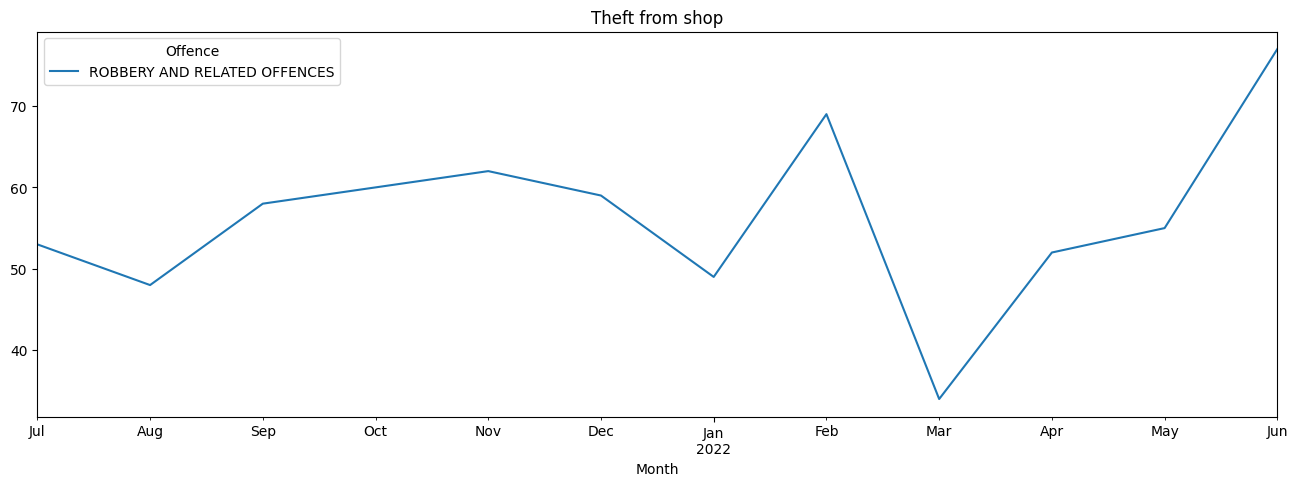

In [38]:
plt.figure()
pivot_df.plot(x="Month",y=['ROBBERY AND RELATED OFFENCES'],figsize=(16, 5))
plt.title('Theft from shop')
plt.show()


In [41]:
pivot_df.describe()

Offence,ACTS INTENDED TO CAUSE INJURY,FRAUD DECEPTION AND RELATED OFFENCES,HOMICIDE AND RELATED OFFENCES,OTHER OFFENCES AGAINST THE PERSON,PROPERTY DAMAGE AND ENVIRONMENTAL,ROBBERY AND RELATED OFFENCES,SERIOUS CRIMINAL TRESPASS,SEXUAL ASSAULT AND RELATED OFFENCES,THEFT AND RELATED OFFENCES
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1649.250000,514.583333,3.416667,114.500000,1755.083333,56.333333,1044.416667,176.916667,3992.916667
std,109.298694,47.841516,2.503028,15.985789,102.588727,10.857200,84.410747,20.978163,193.934130
min,1403.000000,456.000000,0.000000,89.000000,1579.000000,34.000000,925.000000,140.000000,3686.000000
25%,1614.750000,477.500000,2.000000,105.750000,1709.250000,51.250000,994.250000,160.250000,3900.250000
50%,1652.500000,509.000000,3.000000,111.500000,1733.500000,56.500000,1038.000000,182.500000,4003.000000
75%,1694.250000,544.750000,5.000000,123.750000,1807.000000,60.500000,1117.750000,190.000000,4091.750000
max,1812.000000,591.000000,8.000000,145.000000,1949.000000,77.000000,1163.000000,210.000000,4402.000000


In [42]:
rowsum = pivot_df.iloc[:,1:].sum(axis=0)
colsum = pivot_df.iloc[:,1:].sum(axis=1)


In [43]:
rowsum.sum()

111689.0

In [44]:
df['Offence count'].sum()

111689

In [46]:
amount_of_features = len(pivot_df.columns)
amount_of_features

10